## Neural Computing Coursework - Training Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('dermatology.csv')

In [3]:
data.columns = data.columns.str.lstrip()

In [4]:
data = data.replace('?',np.nan )

In [5]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history, (0 or 1)                    0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [6]:
data.shape

(366, 35)

In [7]:
data['Age'] = pd.to_numeric(data['Age'])

Imputing the mean of the age column and replacing missing values with the mean. Preserves underlying distribution.

In [8]:
mean_age = data['Age'].mean()

In [9]:
data['Age'] = data['Age'].replace(np.nan, mean_age)

In [10]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history, (0 or 1)                    0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [11]:
data.shape

(366, 35)

In [12]:
data.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.155687,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [13]:
columns = data.columns

Distribution of data for each feature present in dataset

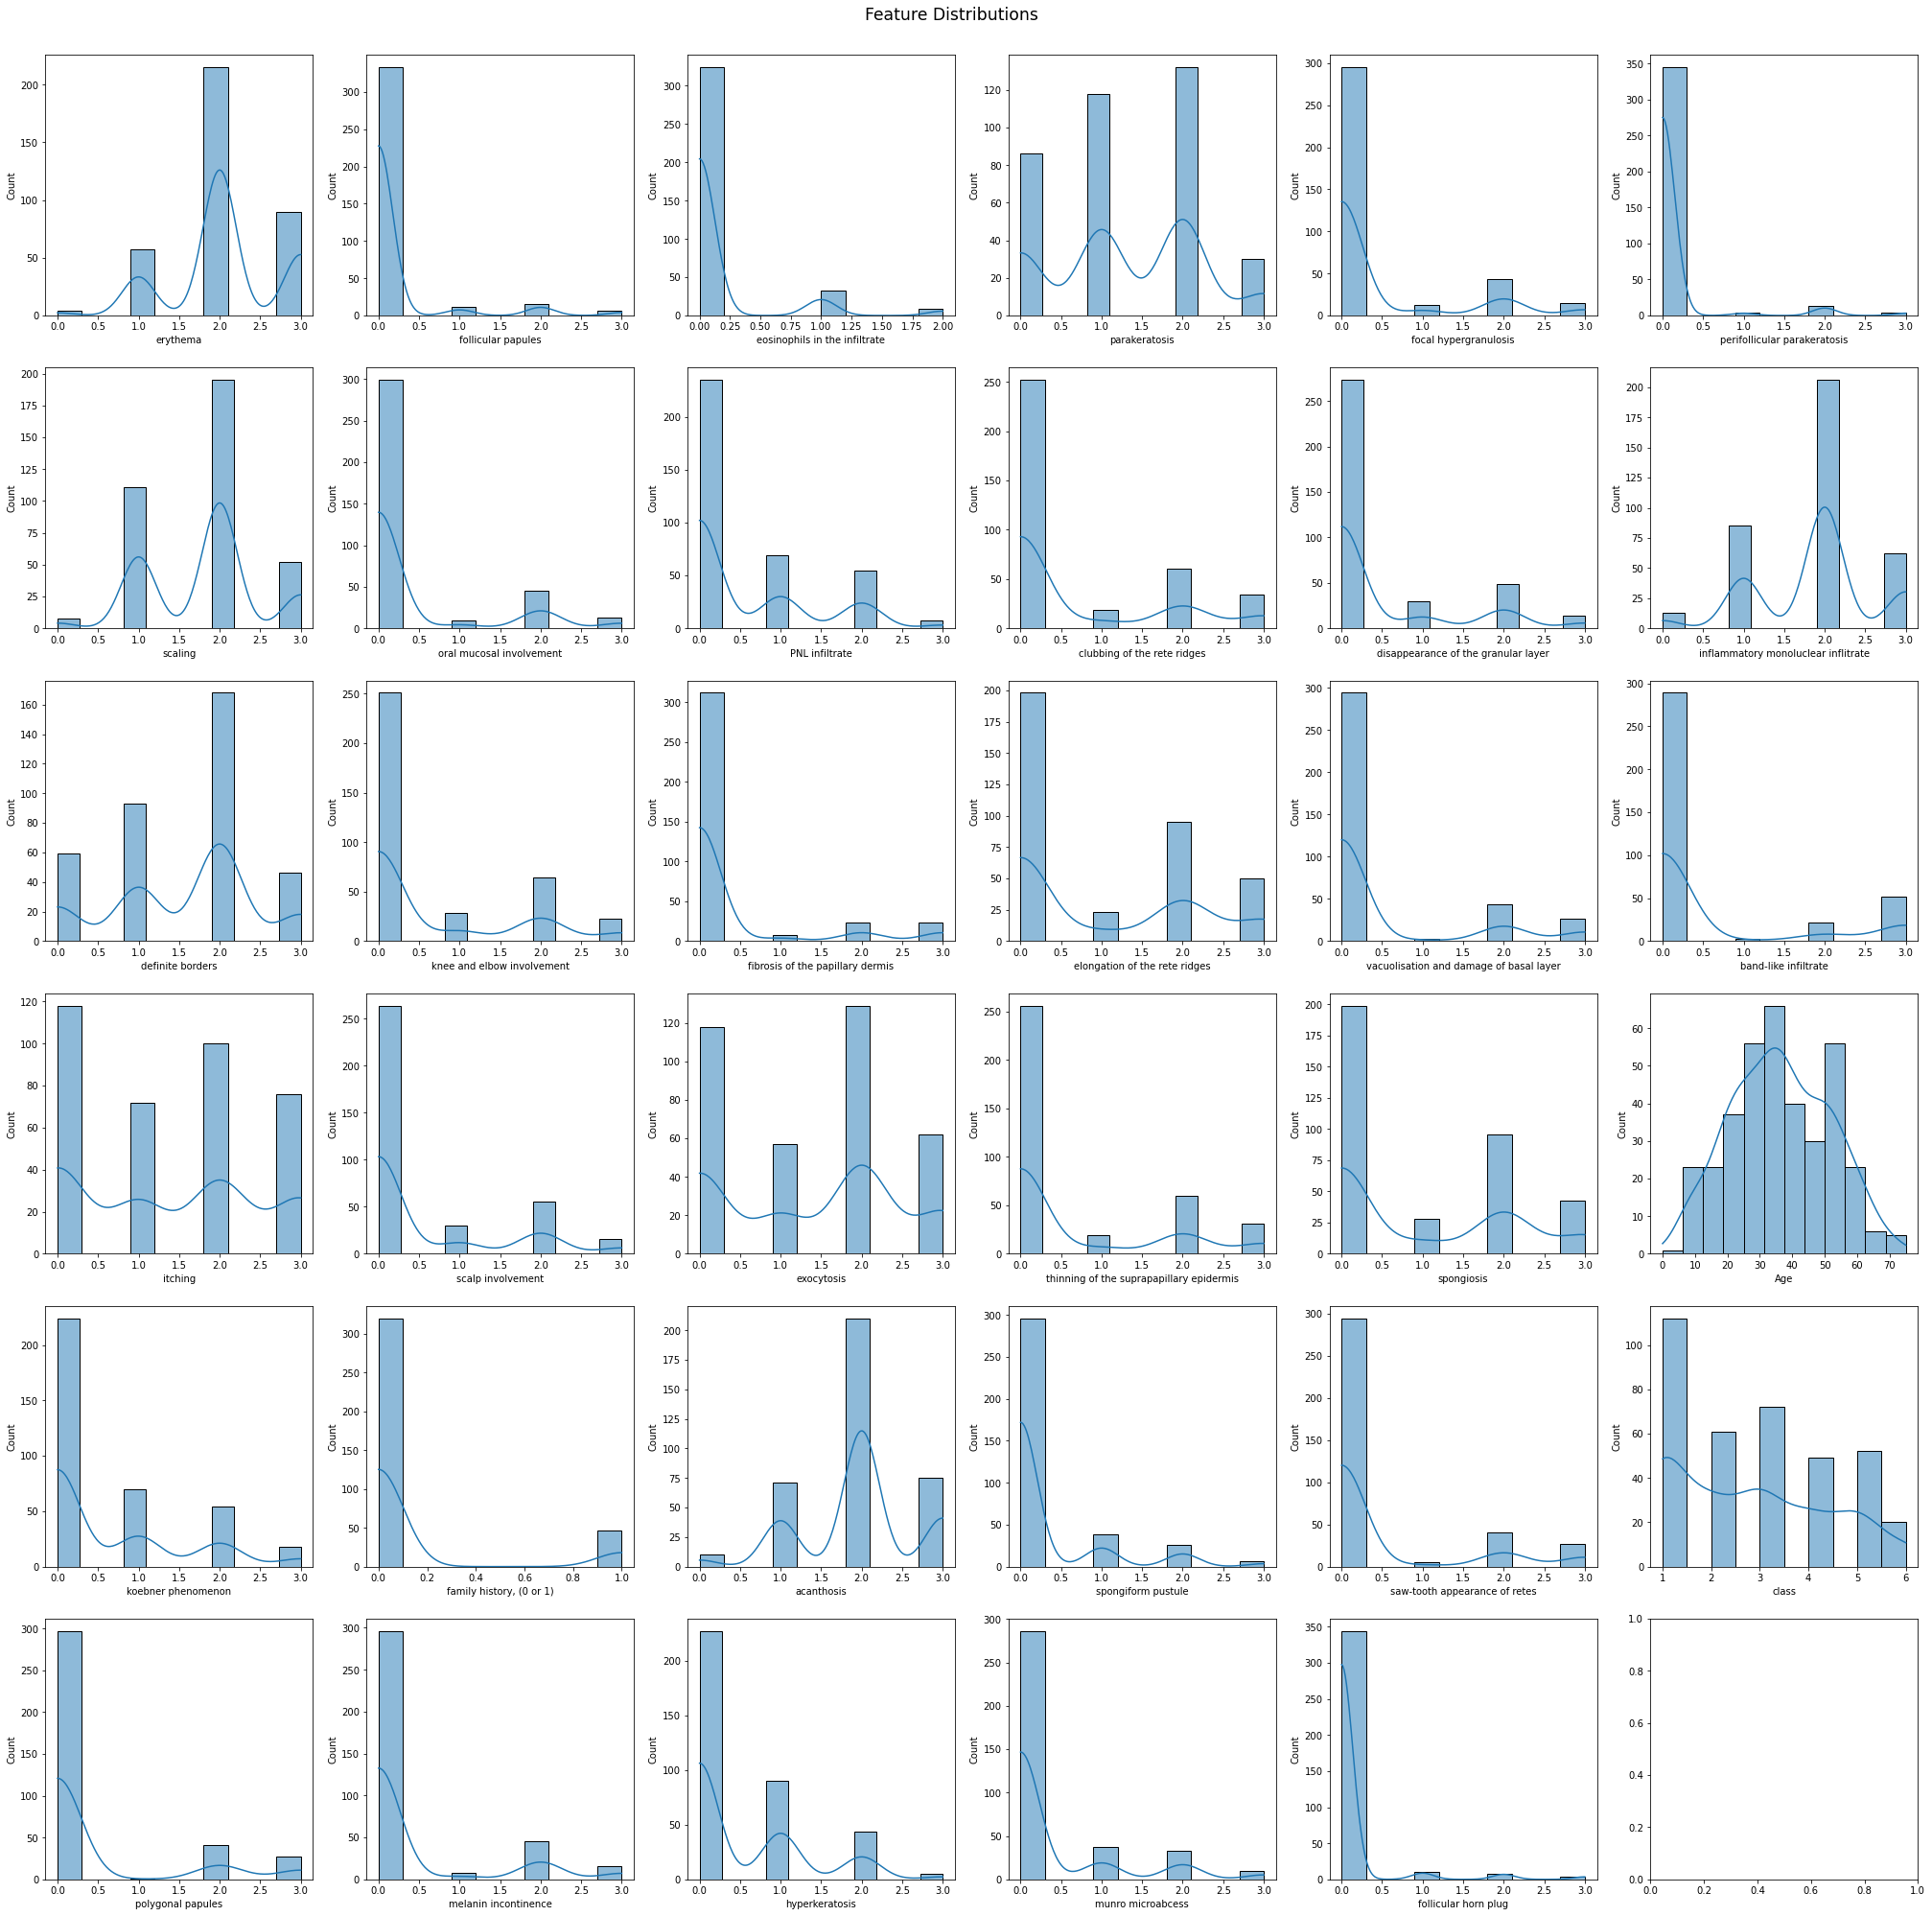

In [113]:
import seaborn as sns

fig, axs = plt.subplots(6, 6, figsize=(35, 35))

x = 0
y = 0

for heading in data.columns:
    sns.histplot(data=data[heading], kde=True, ax=axs[x, y])
    x += 1
    if x == 6:
        y += 1
        x = 0      

fig.suptitle("Feature Distributions", x = 0.5, y = 0.9, fontsize = 'xx-large')
plt.show()

Pearson correlation heatmap

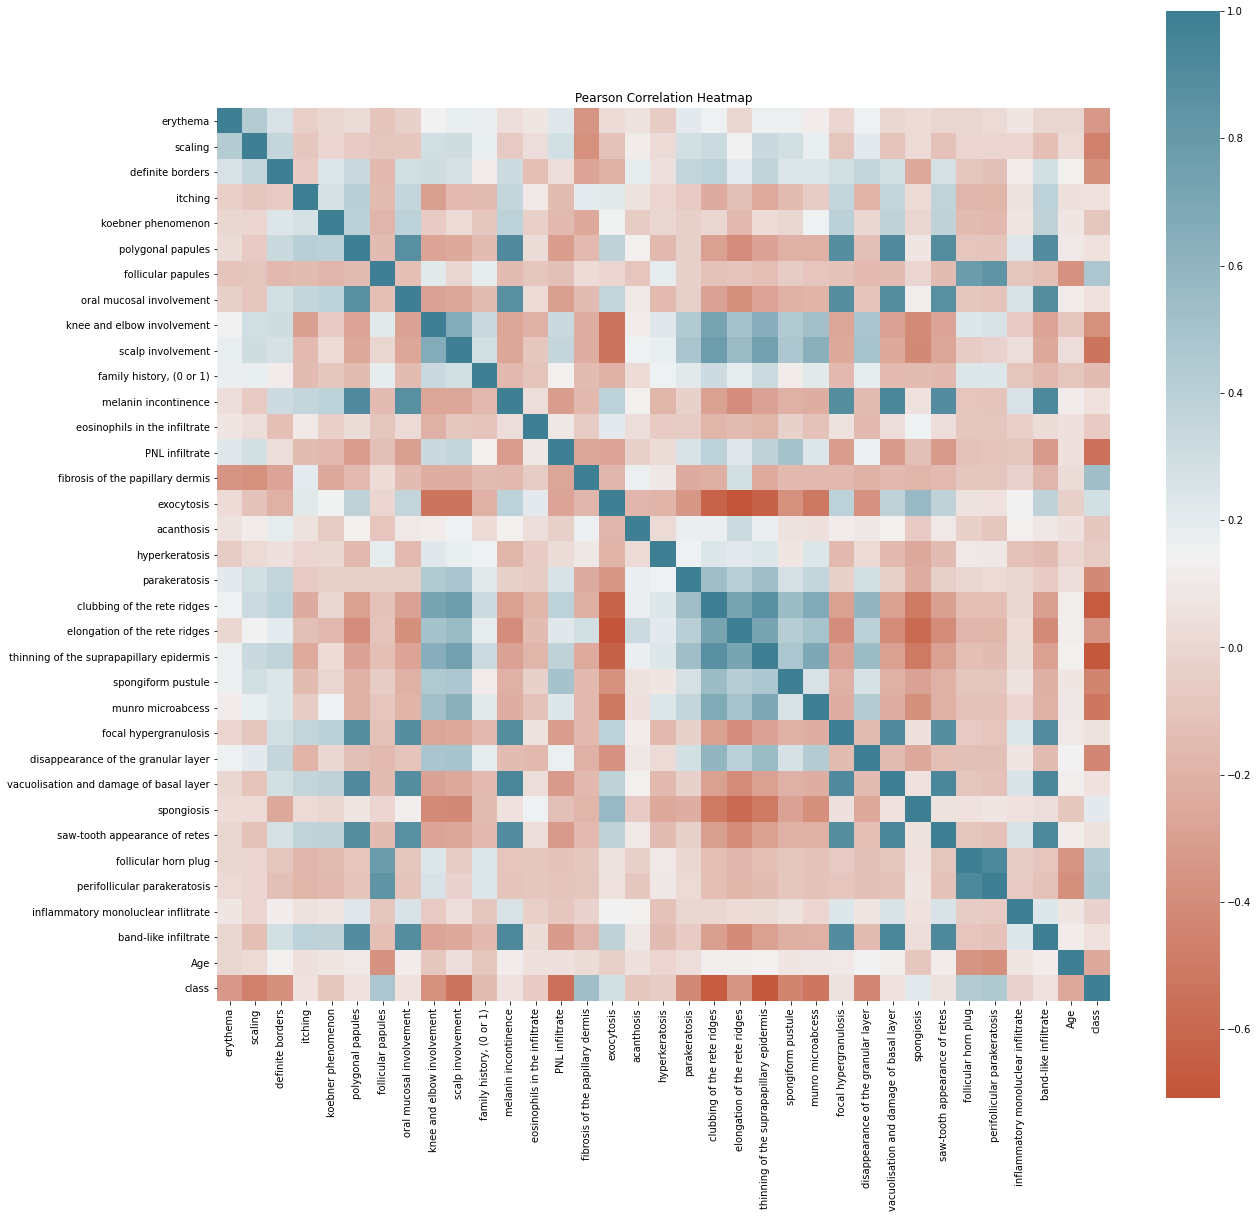

In [116]:
corr = data.corr()

plt.figure(figsize = (20,20))
ax = sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_title("Pearson Correlation Heatmap")
plt.show()

Cramer's V correlation function. Taken from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix. A correction factor is introduced to prevent overestimation. 

In [16]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [17]:
headings = data.columns
size = len(headings)
cramers_matrix = pd.DataFrame(index = headings)
cramers_list = []

for x in range(0, size):
    for y in range(0, size):
        cramers_list.append(cramers_v(data[headings[x]], data[headings[y]]))        
    cramers_matrix[headings[x]] = cramers_list
    cramers_list = []

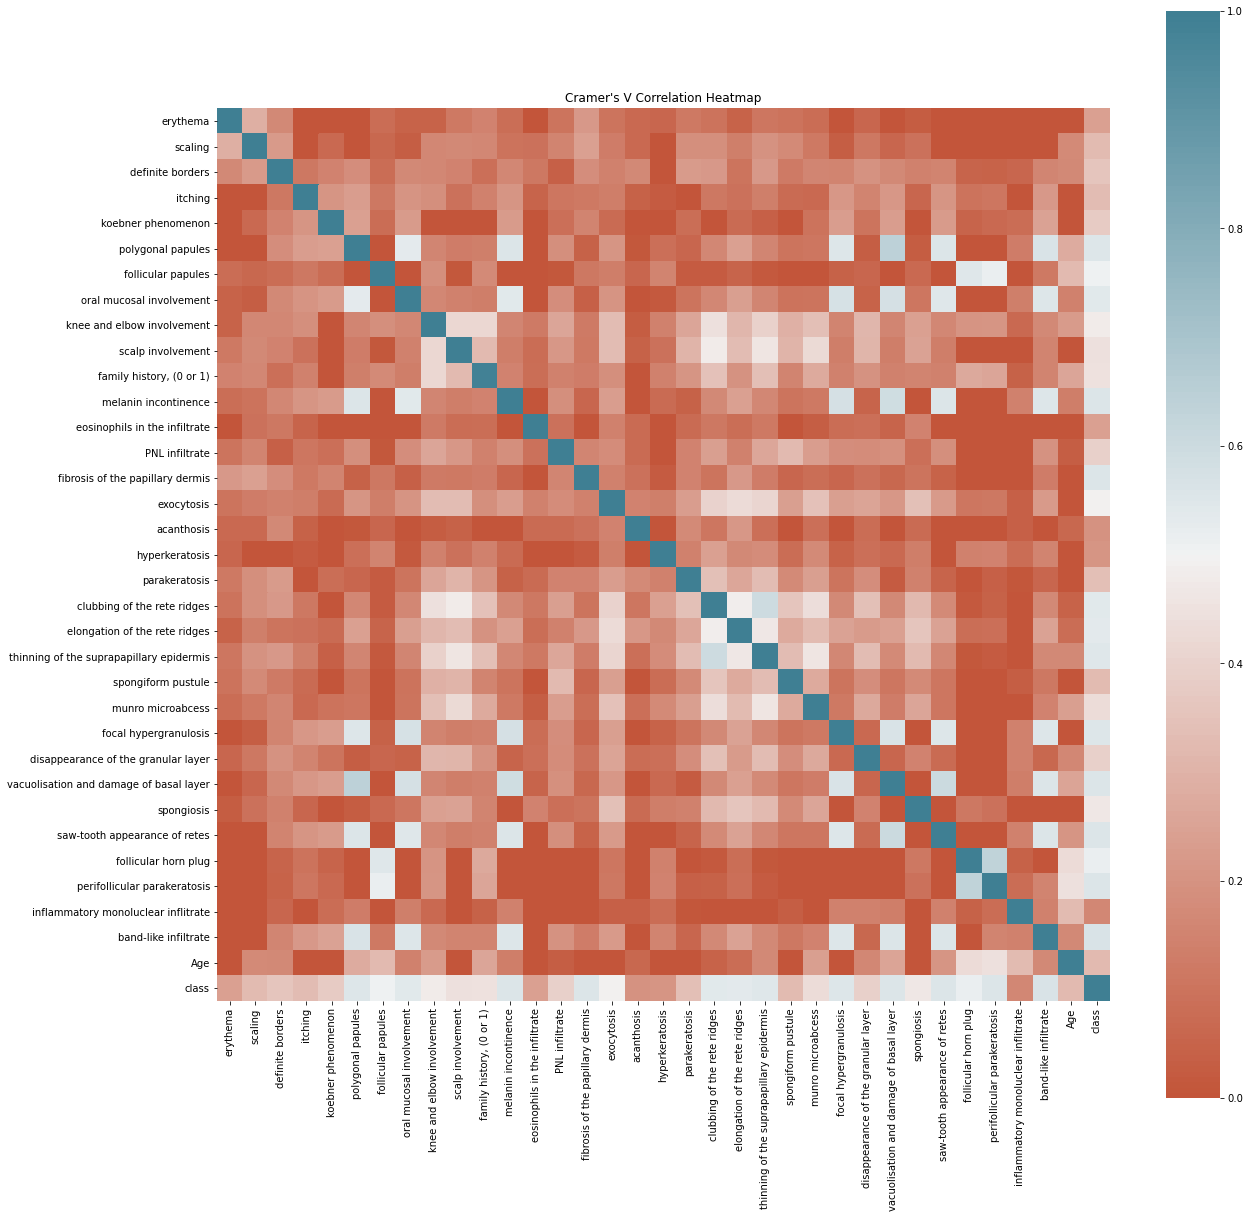

In [117]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(cramers_matrix, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_title("Cramer's V Correlation Heatmap")
plt.show()

Splitting dataset into features and labels. the labels had 1 subtracted from it so that it can fit the MLP network.

In [19]:
data_vars = data.iloc[:,:-1]
data_labels = data.iloc[:, -1].values
data_labels = data_labels - 1

data_vars = data_vars.astype(np.float32)
data_vars = data_vars.to_numpy()
data_labels = data_labels.astype(np.int64)

In [20]:
data_labels.min(), data_labels.max()

(0, 5)

In [21]:
data_vars.shape, data_labels.shape

((366, 34), (366,))

In [22]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data_vars, data_labels, test_size = 0.25, train_size = 0.75, random_state = 42)

Scaling data for better model accuracy

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
import torch
from torch import nn
import torch.nn.functional as F
device = 'cpu'

In [25]:
import math

input_layer_dim = 34
output_layer_dim = 6
hidden_layer_dim = 10

In [26]:
print(input_layer_dim)
print(hidden_layer_dim)
print(output_layer_dim)

34
10
6


Nueral MLP network with ReLU and Softmax activation functions. Softmax must be used for multi-class classification problems. Model sourced from tutorials

In [27]:
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=input_layer_dim,
            hidden_dim=hidden_layer_dim,
            output_dim=output_layer_dim,
            dropout=0.5,
    ):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

Training without scaling

In [28]:
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping

torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=20,
    lr=0.1,
    device=device,
)

In [29]:
net.fit(x_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.3126       0.2000        1.7961  0.2867
      2        1.7921       0.2000        1.7898  0.0060
      3        1.7856       0.2000        1.7842  0.0090
      4        1.7811       0.2000        1.7788  0.0070
      5        1.7751       0.2000        1.7736  0.0060
      6        1.7711       0.2000        1.7676  0.0040
      7        1.7650       0.2000        1.7612  0.0080
      8        1.7575       0.2000        1.7467  0.0090
      9        1.7565       0.2000        1.7480  0.0080
     10        1.7338       0.3818        1.7132  0.0080
     11        1.7439       0.4000        1.7068  0.0110
     12        1.7057       0.2000        1.7425  0.0100
     13        1.7183       0.2909        1.6612  0.0110
     14        1.7064       0.4364        1.6782  0.0100
     15        1.6720       0.3091        1.6337  0.0110


C:\Users\nairx108\anaconda3\lib\site-packages\torch\autograd\__init__.py:145: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(


     16        1.6967       0.2182        1.7393  0.0070
     17        1.7364       0.3091        1.7099  0.0090
     18        1.6661       0.4545        1.6477  0.0080
     19        2.1065       0.2000        1.7400  0.0100
     20        1.7388       0.2000        1.7373  0.0090


Without scaling, horrendous accuracy

In [30]:
from sklearn.metrics import accuracy_score

y_pred = net.predict(x_test)

accuracy_score(y_test, y_pred)

0.18478260869565216

Training with scaled inputs

In [31]:
from skorch import NeuralNetClassifier

torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=20,
    lr=0.1,
    device=device,    
)

In [32]:
net.fit(x_train_scaled, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8418       0.1818        1.7691  0.0090
      2        1.7528       0.1818        1.6971  0.0110
      3        1.6663       0.2909        1.6264  0.0130
      4        1.6315       0.3091        1.5622  0.0070
      5        1.5576       0.4000        1.5009  0.0080
      6        1.5022       0.6727        1.4351  0.0050
      7        1.4349       0.7091        1.3679  0.0070
      8        1.4055       0.7273        1.2977  0.0070
      9        1.3218       0.7455        1.2255  0.0050
     10        1.2953       0.7636        1.1610  0.0100
     11        1.2830       0.8000        1.1010  0.0110
     12        1.2026       0.7818        1.0453  0.0070
     13        1.1398       0.7818        0.9903  0.0090
     14        1.1058       0.7636        0.9464  0.0080
     15        1.0947       0.7818        0.9064  0.0083
     16        1.0501       0.8

A vast improvement in accuracy

In [33]:
from sklearn.metrics import accuracy_score

y_pred = net.predict(x_test_scaled)

accuracy_score(y_test, y_pred)

0.8478260869565217

SMOTE is required as the dataset is imbalanced. Using imbalanced-learn library

In [34]:
from imblearn.over_sampling import SMOTE

x_smote_sampled, y_smote_sampled = SMOTE().fit_resample(x_train_scaled, y_train)

In [35]:
from collections import Counter

print(sorted(Counter(y_smote_sampled).items()))

[(0, 78), (1, 78), (2, 78), (3, 78), (4, 78), (5, 78)]


In [36]:
x_smote_sampled.shape, y_smote_sampled.shape

((468, 34), (468,))

Hyperparameter tuning

In [37]:
import torch.optim as optim

torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    lr=1,
    max_epochs=100,
    callbacks=[EarlyStopping()],
    optimizer__weight_decay=0.01,
    optimizer__momentum=1,
    criterion = nn.CrossEntropyLoss,
    optimizer = optim.SGD,
)

net.fit(x_smote_sampled, y_smote_sampled)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7891       0.5000        1.6863  0.0120
      2        1.6525       0.7234        1.4875  0.0120
      3        1.5648       0.6489        1.3375  0.0170
      4        1.5033       0.8298        1.2341  0.0099
      5        1.4528       0.7340        1.2613  0.0110
      6        1.3960       0.8936        1.1795  0.0140
      7        1.3596       0.9681        1.1301  0.0162
      8        1.3274       0.9681        1.1015  0.0170
      9        1.3011       0.9468        1.1058  0.0150
     10        1.3204       0.8723        1.1796  0.0140
     11        1.4141       0.8191        1.2728  0.0190
     12        1.4841       0.8830        1.2187  0.0160
Stopping since valid_loss has not improved in the last 5 epochs.


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ClassifierModule(
    (dropout): Dropout(p=0.5, inplace=False)
    (hidden): Linear(in_features=34, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=6, bias=True)
  ),
)

In [38]:
y_pred = net.predict(x_test_scaled)

accuracy_score(y_test, y_pred)

0.9456521739130435

In [39]:
params = {
    'optimizer__lr': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_epochs':[32, 64, 128],
    'module__hidden_dim': [12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    'module__dropout' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'optimizer__weight_decay': [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'optimizer__momentum': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

cv must be <= 5 and n_iter must be <= 20 for convergence

In [40]:
from sklearn.model_selection import RandomizedSearchCV

torch.manual_seed(0)

hyp = RandomizedSearchCV(net,params,refit=True,cv=5,scoring='accuracy',n_iter=10)

In [41]:
hyp.fit(x_smote_sampled, y_smote_sampled);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7885       0.3600        1.7531  0.0100
      2        1.7351       0.6267        1.6341  0.0160
      3        1.5770       0.5333        1.4849  0.0140
      4        1.4935       0.5333        1.4384  0.0140
      5        1.4444       0.5600        1.4100  0.0140
      6        1.4159       0.6533        1.3790  0.0140
      7        1.3980       0.6667        1.3447  0.0140
      8        1.3546       0.7733        1.3115  0.0090
      9        1.3143       0.8400        1.2704  0.0150
     10        1.2794       0.8533        1.2255  0.0090
     11        1.2483       0.9467        1.1843  0.0131
     12        1.2048       0.9733        1.1569  0.0140
     13        1.1838       0.9733        1.1356  0.0140
     14        1.1684       0.9733        1.1212  0.0130
     15        1.1404       0.9600        1.1160  0.0130
     16        1.1412       0.9

In [42]:
hyp_results = hyp.cv_results_
rank_order = hyp_results['rank_test_score'] 

for rank in range(1,11):
    rank_index = np.argwhere(rank_order == rank)
    for item in rank_index:
        index = item[0]
        print("Rank: {0}".format(rank))
        print("Mean Test Score: {0} (std: {1})".format(hyp_results['mean_test_score'][index], hyp_results['std_test_score'][index]))
        print("Mean Fit Time: {0} (std: {1})".format(hyp_results['mean_fit_time'][index], hyp_results['std_fit_time'][index]))
        print("Network Parameters: {0}".format(hyp_results['params'][index]))
        if rank == 1:
            hyp_weight_decay = hyp_results['params'][index]['optimizer__weight_decay']
            hyp_momentum = hyp_results['params'][index]['optimizer__momentum']
            hyp_lr = hyp_results['params'][index]['optimizer__lr']
            hyp_hidden_dim = hyp_results['params'][index]['module__hidden_dim']
            hyp_dropout = hyp_results['params'][index]['module__dropout']
            hyp_max_epochs = hyp_results['params'][index]['max_epochs']

Rank: 1
Mean Test Score: 0.9893617021276595 (std: 0.011653671436280126)
Mean Fit Time: 0.32595372200012207 (std: 0.09701457190294462)
Network Parameters: {'optimizer__weight_decay': 0, 'optimizer__momentum': 0.8, 'optimizer__lr': 0.7, 'module__hidden_dim': 22, 'module__dropout': 0, 'max_epochs': 32}
Rank: 2
Mean Test Score: 0.9808281857698468 (std: 0.018292235769128612)
Mean Fit Time: 0.3456891059875488 (std: 0.05024799843852999)
Network Parameters: {'optimizer__weight_decay': 0.01, 'optimizer__momentum': 0.9, 'optimizer__lr': 0.3, 'module__hidden_dim': 16, 'module__dropout': 0.2, 'max_epochs': 64}
Rank: 3
Mean Test Score: 0.9807824296499656 (std: 0.014106694129002954)
Mean Fit Time: 1.9286970138549804 (std: 0.14454100546678916)
Network Parameters: {'optimizer__weight_decay': 0.02, 'optimizer__momentum': 0.2, 'optimizer__lr': 0.2, 'module__hidden_dim': 28, 'module__dropout': 0.3, 'max_epochs': 128}
Rank: 4
Mean Test Score: 0.9765728666209107 (std: 0.022704373876707224)
Mean Fit Time: 0

In [43]:
hidden_layer_dim = hyp_hidden_dim

In [44]:
class TunedClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=input_layer_dim,
            hidden_dim=hidden_layer_dim,
            output_dim=output_layer_dim,
            dropout=0.5,
    ):
        super(TunedClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [45]:
torch.manual_seed(0)

MLP_tuned_net = NeuralNetClassifier(
    TunedClassifierModule,
    lr = hyp_lr,
    max_epochs = hyp_max_epochs,
    callbacks = [EarlyStopping()],
    optimizer__weight_decay = hyp_weight_decay,
    optimizer__momentum = hyp_momentum,
    criterion = nn.CrossEntropyLoss,
    optimizer = optim.SGD,
    module__dropout = hyp_dropout,
)

MLP_tuned_net.fit(x_smote_sampled, y_smote_sampled)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7781       0.5319        1.6809  0.0080
      2        1.6327       0.6702        1.5319  0.0110
      3        1.5099       0.8191        1.4147  0.0070
      4        1.3679       0.8298        1.2443  0.0120
      5        1.2245       0.8404        1.1852  0.0160
      6        1.1542       0.9681        1.1103  0.0120
      7        1.0867       0.9681        1.0848  0.0140
      8        1.0740       0.9894        1.0765  0.0090
      9        1.0623       0.9787        1.0755  0.0090
     10        1.0576       0.9787        1.0682  0.0100
     11        1.0553       0.9894        1.0657  0.0110
     12        1.0541       0.9894        1.0640  0.0130
     13        1.0525       0.9894        1.0630  0.0140
     14        1.0514       0.9894        1.0616  0.0160
     15        1.0505       0.9894        1.0608  0.0090
     16        1.0500       0.9

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=TunedClassifierModule(
    (dropout): Dropout(p=0, inplace=False)
    (hidden): Linear(in_features=34, out_features=22, bias=True)
    (output): Linear(in_features=22, out_features=6, bias=True)
  ),
)

In [118]:
y_pred = MLP_tuned_net.predict(x_test_scaled)

accuracy_score(y_test, y_pred)

0.967391304347826

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.96      0.96        92
weighted avg       0.97      0.97      0.97        92



MLP cross validation

In [48]:
from sklearn.model_selection import cross_validate

scaler = StandardScaler()
scaler.fit(data_vars)
data_scale_fit = scaler.transform(data_vars)

data_x_smote_scale_fit, data_y_smote_scale_fit = SMOTE().fit_resample(data_scale_fit, data_labels)

scores = cross_validate(MLP_tuned_net, data_x_smote_scale_fit, data_y_smote_scale_fit, scoring='accuracy', cv=10)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.7901       0.6281        1.7070  0.0190
      2        1.6024       0.7025        1.3982  0.0220
      3        1.3535       0.7851        1.2818  0.0190
      4        1.2349       0.9752        1.1098  0.0200
      5        1.0927       0.9587        1.0851  0.0170
      6        1.1004       0.9752        1.0744  0.0110
      7        1.0784       0.9752        1.0760  0.0180
      8        1.0640       0.9669        1.0803  0.0190
      9        1.0556       0.9835        1.0671  0.0210
     10        1.0538       0.9835        1.0649  0.0180
     11        1.0523       0.9752        1.0687  0.0100
     12        1.0501       0.9752        1.0702  0.0120
     13        1.0490       0.9752        1.0703  0.0130
     14        1.0483       0.9752        1.0708  0.0110
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss  

In [49]:
scores

{'fit_time': array([0.28583431, 0.32181525, 0.2188735 , 0.21587634, 0.60565376,
        0.56067753, 0.23216772, 0.27783847, 0.18689251, 0.20388341]),
 'score_time': array([0.00299811, 0.00299835, 0.00299811, 0.0029974 , 0.0039959 ,
        0.00099921, 0.00099921, 0.00399756, 0.00399733, 0.00299931]),
 'test_score': array([0.97058824, 0.98529412, 0.95522388, 0.97014925, 0.97014925,
        0.98507463, 1.        , 0.98507463, 1.        , 1.        ])}

In [50]:
print("Test Score after 10 fold k validation: {:.3f}%".format(scores['test_score'].mean()*100))

Test Score after 10 fold k validation: 98.216%


In [51]:
from joblib import dump, load

dump(MLP_tuned_net, 'derm_MLP_tuned_model.joblib') 

['derm_MLP_tuned_model.joblib']

Training curve code sourced from Kaggle https://www.kaggle.com/mlpotter/pytorch-and-skorch-for-deep-learning

In [52]:
epochs = [i for i in range(len(hyp.best_estimator_.history))]
train_loss = hyp.best_estimator_.history[:,'train_loss']
valid_loss = hyp.best_estimator_.history[:,'valid_loss']

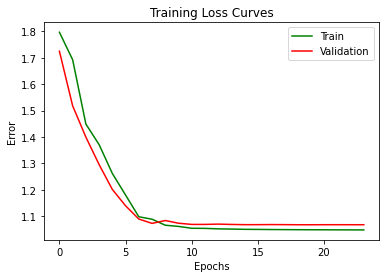

In [53]:
plt.plot(epochs,train_loss,'g-');
plt.plot(epochs,valid_loss,'r-');
plt.title('Training Loss Curves');
plt.xlabel('Epochs');
plt.ylabel('Error');
plt.legend(['Train','Validation']);

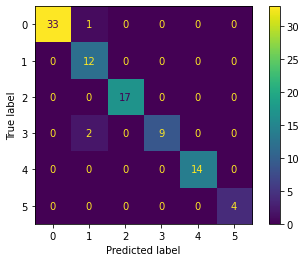

In [129]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plot_labels = [0, 1, 2, 3, 4, 5]
cm = confusion_matrix(y_test, y_pred, labels=plot_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=plot_labels)
disp.plot() 

SVC Neural Network Training

In [55]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(x_train, y_train);

In [56]:
y_pred = classifier.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[33  0  0  0  0  1]
 [ 0 12  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  2  0  9  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [78]:
accuracy_score(y_test, y_pred)

0.9891304347826086

In [79]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.84 %
Standard Deviation: 5.30 %


In [80]:
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(x_train_scaled, y_train);

In [81]:
y_pred = classifier.predict(x_test_scaled)

In [82]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  2  0  9  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  4]]


In [83]:
accuracy_score(y_test, y_pred)

0.9782608695652174

In [84]:
accuracies = cross_val_score(estimator = classifier, X = x_train_scaled, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.95 %
Standard Deviation: 5.85 %


In [85]:
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(x_smote_sampled, y_smote_sampled);

y_pred = classifier.predict(x_test_scaled)

In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  2  0  9  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  4]]


In [87]:
accuracy_score(y_test, y_pred)

0.9782608695652174

In [88]:
accuracies = cross_val_score(estimator = classifier, X = x_train_scaled, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.95 %
Standard Deviation: 5.85 %


Hyperparameter tuning

In [89]:
svc_param = {"C": [0.1,1, 10, 100], "gamma": [1,0.1,0.01,0.001], "kernel": ['linear', 'rbf', 'poly', 'sigmoid']}

hyp_svc = RandomizedSearchCV(classifier, svc_param, n_iter=50, verbose=0, cv=10)

hyp_svc.fit(x_smote_sampled, y_smote_sampled);

In [90]:
print(hyp_svc.best_estimator_)

SVC(C=100, gamma=0.01, kernel='linear', random_state=0)


In [91]:
hyp_svc.best_estimator_.fit(x_smote_sampled, y_smote_sampled);

In [92]:
y_pred = hyp_svc.best_estimator_.predict(x_test_scaled)

accuracy_score(y_test, y_pred)

0.9891304347826086

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        17
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.99        92
   macro avg       0.99      0.98      0.99        92
weighted avg       0.99      0.99      0.99        92



In [94]:
SVC_tuned_net = hyp_svc.best_estimator_

dump(SVC_tuned_net, 'derm_SVC_tuned_model.joblib') 

['derm_SVC_tuned_model.joblib']

In [95]:
hyp_svc_results = hyp_svc.cv_results_
rank_order = hyp_svc_results['rank_test_score'] 

for rank in range(1,11):
    rank_index = np.argwhere(rank_order == rank)
    for item in rank_index:
        index = item[0]
        print("Rank: {0}".format(rank))
        print("Mean Test Score: {0} (std: {1})".format(hyp_svc_results['mean_test_score'][index], hyp_svc_results['std_test_score'][index]))
        print("Mean Fit Time: {0} (std: {1})".format(hyp_svc_results['mean_fit_time'][index], hyp_svc_results['std_fit_time'][index]))
        print("Network Parameters: {0}".format(hyp_svc_results['params'][index]))

Rank: 1
Mean Test Score: 0.9872340425531915 (std: 0.02169795537699056)
Mean Fit Time: 0.0027950286865234377 (std: 0.000397973671329911)
Network Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 100}
Rank: 1
Mean Test Score: 0.9872340425531915 (std: 0.02169795537699056)
Mean Fit Time: 0.003769516944885254 (std: 0.005181816463194861)
Network Parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Rank: 1
Mean Test Score: 0.9872340425531915 (std: 0.02169795537699056)
Mean Fit Time: 0.0018636465072631836 (std: 0.004673903157466248)
Network Parameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 100}
Rank: 1
Mean Test Score: 0.9872340425531915 (std: 0.02169795537699056)
Mean Fit Time: 0.0028012752532958984 (std: 0.00040145580178939437)
Network Parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 100}
Rank: 5
Mean Test Score: 0.9851063829787234 (std: 0.021382714087491247)
Mean Fit Time: 0.003394889831542969 (std: 0.00048684166405689905)
Network Parameters: {'kernel': 'sigmoid', 'gamma': 0.00

In [96]:
scores = cross_validate(SVC_tuned_net, data_x_smote_scale_fit, data_y_smote_scale_fit, scoring='accuracy', cv=10)

In [97]:
scores['test_score'].mean()

0.9925373134328359

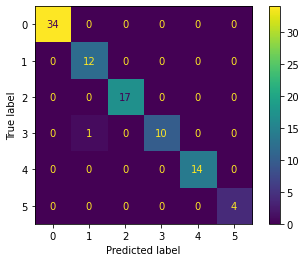

In [99]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=plot_labels)
disp.plot() 